#Convolutional Neural Networks and Computer Vision with TensorFlow

computer vision is practice of writing algorithms which can discover patterns like recognizing car in front

##Get the data

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-09-03 15:41:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   156MB/s    in 0.7s    

2024-09-03 15:41:17 (156 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#inspect the data

a very crucial step at beginneing of machine learning is become one with data

and for computer vision project...this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

#walk through pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}' . ")

there are 2 directories and 0 images in'pizza_steak' . 
there are 2 directories and 0 images in'pizza_steak/test' . 
there are 0 directories and 250 images in'pizza_steak/test/pizza' . 
there are 0 directories and 250 images in'pizza_steak/test/steak' . 
there are 2 directories and 0 images in'pizza_steak/train' . 
there are 0 directories and 750 images in'pizza_steak/train/pizza' . 
there are 0 directories and 750 images in'pizza_steak/train/steak' . 


In [6]:
#another way to find how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

###to visualize our images, first lets get out class names progrmmatically

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
#lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setu the target dirctory , we'll view image from here
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape = {img.shape}") # show the shape of image

  return img

image shape = (512, 512, 3)


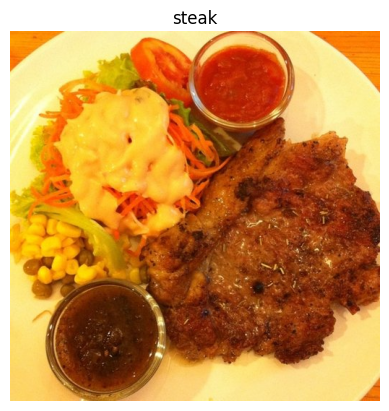

In [9]:
#view random image from training dataset
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "steak")

In [10]:
#the images we've imported and plotted are actually in form of giant arays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[254, 140,   8],
        [254, 140,   8],
        [255, 141,   9],
        ...,
        [250, 122,   0],
        [251, 121,   0],
        [251, 121,   0]],

       [[251, 137,   5],
        [251, 137,   5],
        [251, 137,   5],
        ...,
        [252, 124,   0],
        [254, 124,   0],
        [253, 123,   0]],

       [[248, 136,   2],
        [247, 135,   1],
        [247, 135,   1],
        ...,
        [255, 128,   5],
        [255, 128,   6],
        [255, 127,   5]],

       ...,

       [[253, 216, 109],
        [251, 214, 107],
        [250, 212, 105],
        ...,
        [237, 109,   8],
        [238, 109,   7],
        [236, 107,   3]],

       [[252, 215, 109],
        [250, 213, 107],
        [248, 211, 105],
        ...,
        [241, 113,   6],
        [242, 111,   3],
        [242, 112,   2]],

       [[252, 215, 109],
        [250, 213, 107],
        [248, 211, 105],
        ...,
        [241, 113,   

In [11]:
#view the image shape
img.shape #return width, height and color channel

(512, 512, 3)

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [12]:
#get all the pixel values between 0 and 1
img/255.

array([[[0.99607843, 0.54901961, 0.03137255],
        [0.99607843, 0.54901961, 0.03137255],
        [1.        , 0.55294118, 0.03529412],
        ...,
        [0.98039216, 0.47843137, 0.        ],
        [0.98431373, 0.4745098 , 0.        ],
        [0.98431373, 0.4745098 , 0.        ]],

       [[0.98431373, 0.5372549 , 0.01960784],
        [0.98431373, 0.5372549 , 0.01960784],
        [0.98431373, 0.5372549 , 0.01960784],
        ...,
        [0.98823529, 0.48627451, 0.        ],
        [0.99607843, 0.48627451, 0.        ],
        [0.99215686, 0.48235294, 0.        ]],

       [[0.97254902, 0.53333333, 0.00784314],
        [0.96862745, 0.52941176, 0.00392157],
        [0.96862745, 0.52941176, 0.00392157],
        ...,
        [1.        , 0.50196078, 0.01960784],
        [1.        , 0.50196078, 0.02352941],
        [1.        , 0.49803922, 0.01960784]],

       ...,

       [[0.99215686, 0.84705882, 0.42745098],
        [0.98431373, 0.83921569, 0.41960784],
        [0.98039216, 0

##an end to end example

lets build a convolutional neural netwrok to find patterns in our images, more specifically we need a way to :

 * load our images
 * preprocess our images
 * build a CNN to find patterns in our images
 * compile our CNN
 * fit our CNN to out training data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess the data (get all pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Calculate the correct number of steps per epoch and validation steps
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = valid_data.samples // valid_data.batch_size

# Build a CNN model (similar to tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=steps_per_epoch,  # ensure to cover all samples
    validation_data=valid_data,
    validation_steps=validation_steps  # ensure to cover all validation samples
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.5622 - loss: 0.6730 - val_accuracy: 0.7125 - val_loss: 0.5620
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6213 - val_accuracy: 0.8000 - val_loss: 0.5106
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.6955 - loss: 0.6047 - val_accuracy: 0.6729 - val_loss: 0.5782
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.6250 - loss: 0.7419 - val_accuracy: 0.5500 - val_loss: 0.6526
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.7183 - loss: 0.5560 - val_accuracy: 0.8000 - val_loss: 0.4299


###if above cell is taking longer than 10 sconds per epoch use GPU and rerun some cells above

#using the same model as before

lets use the model we've built in 02 (previous) section to see if it works with out image data

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=train_data.samples // train_data.batch_size,  # correct steps per epoch calculation
    validation_data=valid_data,
    validation_steps=valid_data.samples // valid_data.batch_size  # correct validation steps calculation
)


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.6288 - loss: 1.0310 - val_accuracy: 0.6792 - val_loss: 0.6739
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6562 - loss: 0.7839 - val_accuracy: 0.9000 - val_loss: 0.3507
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.7267 - loss: 0.5585 - val_accuracy: 0.6667 - val_loss: 0.5738
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.4817 - val_accuracy: 0.7500 - val_loss: 0.5156
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7273 - loss: 0.5643 - val_accuracy: 0.7875 - val_loss: 0.4978


In [20]:
#get a summary of model_2
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

despite haveing 20x more parameters than our CNN(model_1) model_2 performed terribly, let's try to improve it

In [22]:
#set random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = train_data.samples,
                        validation_data = valid_data,
                        validation_steps = valid_data.samples
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5878 - loss: 4.6513 - val_accuracy: 0.6700 - val_loss: 1.5348
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7296 - loss: 0.7890 - val_accuracy: 0.7500 - val_loss: 0.5063
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7191 - loss: 0.6091 - val_accuracy: 0.6840 - val_loss: 0.6176
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7700 - loss: 0.5117 - val_accuracy: 0.6020 - val_loss: 1.0961
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7361 - loss: 0.6140 - val_accuracy: 0.6900 - val_loss: 0.5598


In [23]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Binary classification: Let's break it down
We just went through a whirlwind of steps:

 1 : Become one with the data (visualize, visualize, visualize...)

 2 : Preprocess the data (prepare it for a model)

 3 : Create a model (start with a baseline)

 4 : Fit the model

 5 : Evaluate the model

 6 : Adjust different parameters and improve model (try to beat your baseline)

 7 : Repeat until satisfied

#Become one with data

image shape = (512, 512, 3)
image shape = (384, 512, 3)


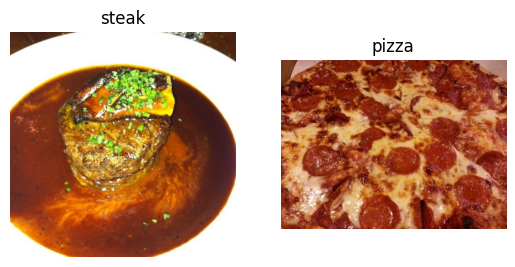

In [24]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

#2. Preprocess the data (prepare it for a model)


In [25]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

 1 : 10,000 images (or more) might not fit into the memory of your processor (GPU).

 2 : Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
# Get a sample of the training data batch
images, labels = train_data.__next__() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [32]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.00392157, 0.00392157, 0.01176471],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.00392157, 0.00392157, 0.01176471],
          [0.        , 0.        , 0.00784314],
          [0.00392157, 0.00392157, 0.01176471],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         ...,
 
         [[0.21960786, 0.21176472, 0.22352943],
          [0.23529

In [33]:
# View the first batch of labels
labels

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

#3. Create a CNN model (start with a baseline)

In [34]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#4. Fit a model

In [37]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [39]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=train_data.samples,
                        validation_data=test_data,
                        validation_steps=test_data.samples)

Epoch 1/5
  47/1500 ━━━━━━━━━━━━━━━━━━━━ 3:53 161ms/step - accuracy: 0.7048 - loss: 0.5801

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7311 - loss: 0.5386 - val_accuracy: 0.8060 - val_loss: 0.4142
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8113 - loss: 0.4161 - val_accuracy: 0.8420 - val_loss: 0.3678
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8707 - loss: 0.3250 - val_accuracy: 0.8340 - val_loss: 0.3887
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8917 - loss: 0.2754 - val_accuracy: 0.8540 - val_loss: 0.3526
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9432 - loss: 0.1883 - val_accuracy: 0.8660 - val_loss: 0.3459


#5. Evaluate the model

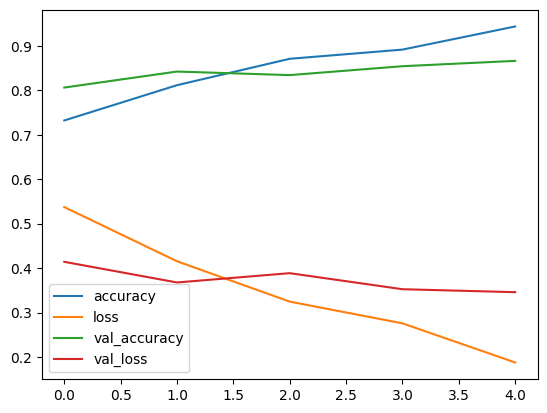

In [42]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot();

judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [43]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

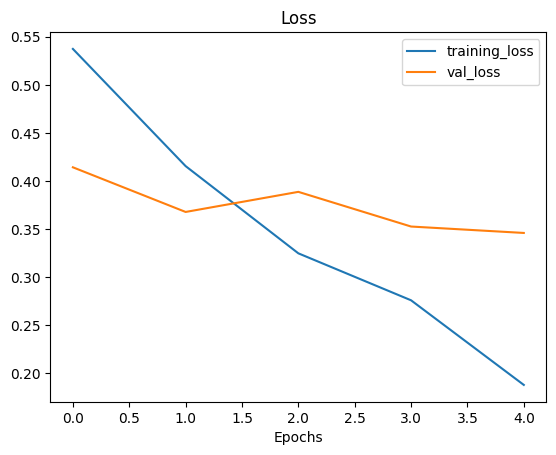

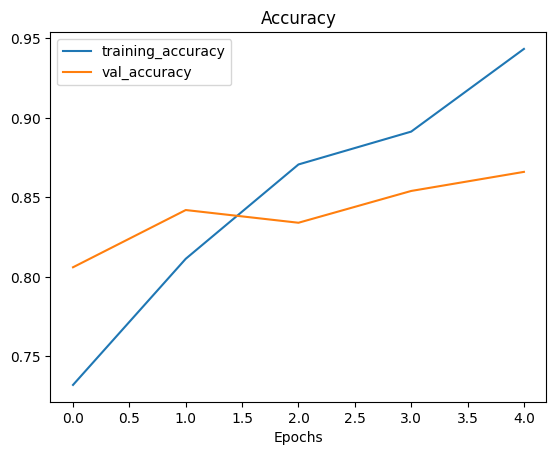

In [44]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [45]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

#6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a basline.

1. Beat the baseline by overfitting a larger model.

2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

1 : Increase the number of convolutional layers.

2 : Increase the number of convolutional filters.

3 : Add another dense layer to the output of our flattened layer.

ways to reduce overfitting :     

1 : add data augmentation
2 : add regularization layer(such as maxPool2D)
3 : add more data

note : reducing overfitting is also called as regularzation

In [46]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [49]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=train_data.samples,
                        validation_data=test_data,
                        validation_steps=test_data.samples)

Epoch 1/5
  46/1500 ━━━━━━━━━━━━━━━━━━━━ 1:44 72ms/step - accuracy: 0.7306 - loss: 0.5665

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7442 - loss: 0.5346 - val_accuracy: 0.8060 - val_loss: 0.4239
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7927 - loss: 0.4489 - val_accuracy: 0.8460 - val_loss: 0.3738
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8031 - loss: 0.4456 - val_accuracy: 0.8440 - val_loss: 0.3834
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8145 - loss: 0.4037 - val_accuracy: 0.7820 - val_loss: 0.4514
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8289 - loss: 0.3938 - val_accuracy: 0.8480 - val_loss: 0.3469


In [50]:
# Check out the model architecture
model_5.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

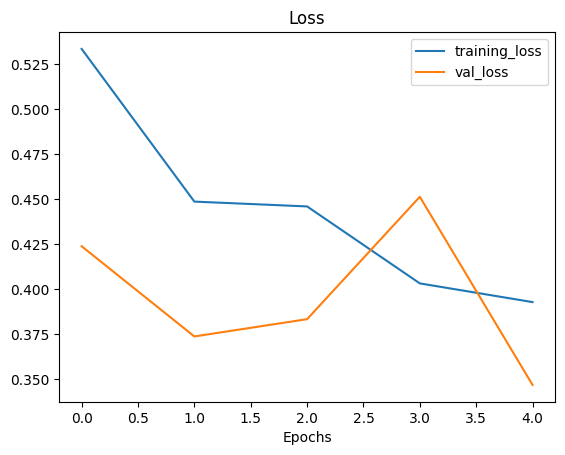

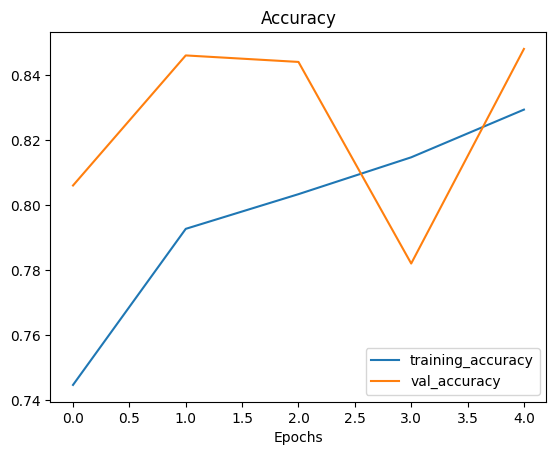

In [51]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

###finding data augmentation

In [52]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, # how much you want your image to rotate
                                             shear_range = 0.2, # how much do you want to shear your image
                                             zoom_range = 0.2, # zoom in randomly your image
                                             width_shift_range = 0.2, # move your image around x axis
                                             height_shift_range = 0.2, # move your image around y axis
                                             horizontal_flip = True) # do you want to flip your image

#create imageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)


Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


 * in my words it is making more data without adding more images like turning old picture of pizza or seak to 30 degree to make other image ykwim right?

In [53]:
#import data and augment it from training directory
print("augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)#for demostration purpose only

#create non-augmented train databatches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

#create non_augmented test data batches
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")


augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


###finally lets visualize some augmented data

In [58]:
#get sample data batches
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__() # labels are'nt augmented only data(images)


showing image number : 8


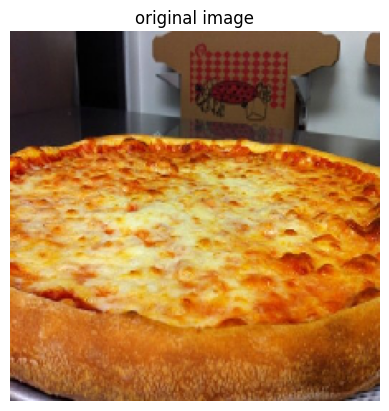

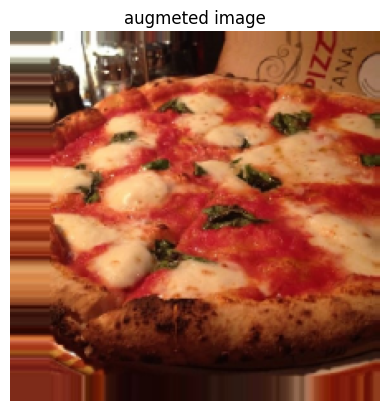

In [59]:
#show original image and augmented image
import random
random_number = random.randint(0, 32) # our atch size is 32
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"augmeted image")
plt.axis(False);

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

In [61]:
#create a model(same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
#fit the model
history_6 = model_6.fit(train_data_augmented, #fitting model 6 on augmented training data
                       epochs = 5,
                       steps_per_epoch = train_data_augmented.samples,
                       validation_data = test_data,
                       validation_steps = test_data.samples)

Epoch 1/5
  46/1500 ━━━━━━━━━━━━━━━━━━━━ 8:09 337ms/step - accuracy: 0.5765 - loss: 0.8999

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.5224 - loss: 0.8263 - val_accuracy: 0.5000 - val_loss: 0.6865
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.5142 - loss: 0.6902 - val_accuracy: 0.5980 - val_loss: 0.6372
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.5888 - loss: 0.6704 - val_accuracy: 0.7080 - val_loss: 0.5835
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6641 - loss: 0.6133 - val_accuracy: 0.7680 - val_loss: 0.5106
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6765 - loss: 0.6054 - val_accuracy: 0.8100 - val_loss: 0.4689


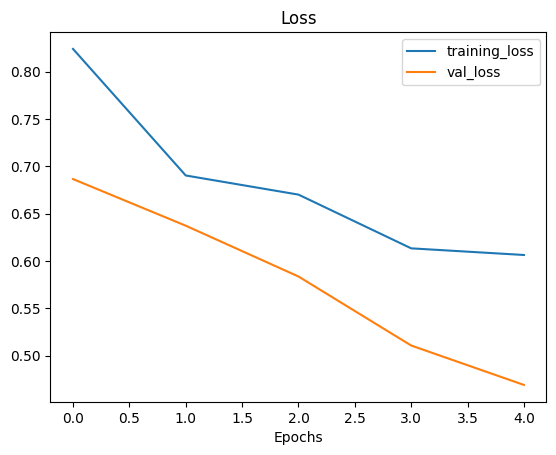

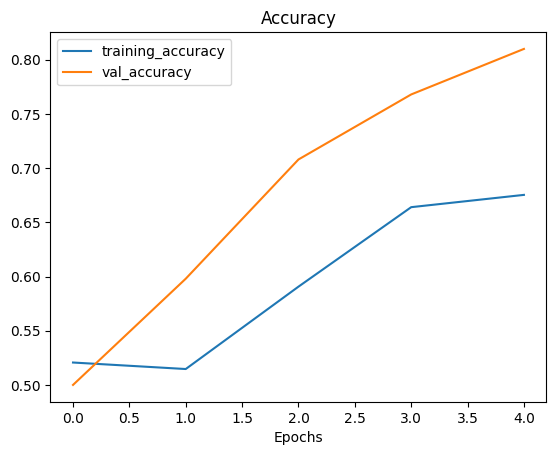

In [62]:
#check our models trainign curves
plot_loss_curves(history_6)

###let's shuffle our augmented training data and train another model(the same as before) on it and see what happens

In [63]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224, 224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32,
                                                                            shuffle =True)

Found 1500 images belonging to 2 classes.


In [65]:
#create the model(same as model 5 and model 6)
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = train_data_augmented_shuffled.samples,
                        validation_data = test_data,
                        validation_steps = test_data.samples)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
  46/1500 ━━━━━━━━━━━━━━━━━━━━ 8:05 334ms/step - accuracy: 0.5698 - loss: 0.6768

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6223 - loss: 0.6479 - val_accuracy: 0.7500 - val_loss: 0.5005
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.7320 - loss: 0.5326 - val_accuracy: 0.8180 - val_loss: 0.3953
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7698 - loss: 0.4985 - val_accuracy: 0.8420 - val_loss: 0.3621
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7688 - loss: 0.4775 - val_accuracy: 0.8680 - val_loss: 0.3553
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7905 - loss: 0.4573 - val_accuracy: 0.8540 - val_loss: 0.3319


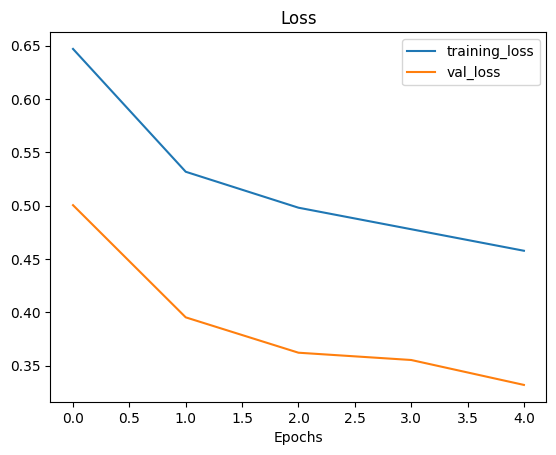

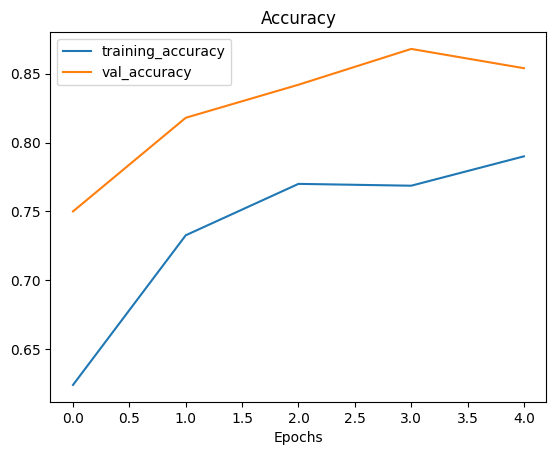

In [66]:
#plot lost curves
plot_loss_curves(history_7)

# 7 : repeat untill satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

 * Increase the number of model layers (e.g. add more convolutional layers).
 * Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
 * Train for longer (more epochs).
 * Finding an ideal learning rate.
 * Get more data (give the model more opportunities to learn).
 * Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

#making a prediction with our trained model on our own custom data


In [67]:
#classes we're working with
print(class_names)

['pizza' 'steak']


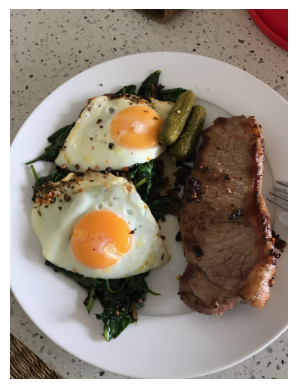

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests

# Download the image from the web
url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
response = requests.get(url)

# Open the image file
image_path = '03-steak.jpeg'
with open(image_path, 'wb') as f:
    f.write(response.content)

# Load the image for display
steak = mpimg.imread(image_path)

# Display the image
plt.imshow(steak)
plt.axis('off')  # Turns off the axis
plt.show()


In [72]:
#check shape of our image
steak.shape

(4032, 3024, 3)

In [74]:
steak_resized = tf.image.resize(steak, [224, 224])

# Normalize the pixel values if your model expects pixel values in [0, 1]
steak_normalized = steak_resized / 255.0

# Add a batch dimension
steak_batch = np.expand_dims(steak_normalized, axis=0)

# Predict using your model
model_7.predict(steak_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


array([[0.8177282]], dtype=float32)

# error because we need to preprocess the data into same fromat as the data our model was trained on

In [75]:
#create function to import image and resize it to be able to use with our model
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, color_channels)
  """
  #rea in the image
  img = tf.io.read_file(filename)
  #decode the read file into tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  #rescale the image to get values between 0 and 1
  img = img/255.
  return img

In [76]:
#load in and preprocess our custom images
steak = load_and_prep_image("03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [77]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.82250047]], dtype=float32)

let's write a little function to convert predictions into their class names and then plot the target image.

In [78]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [79]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


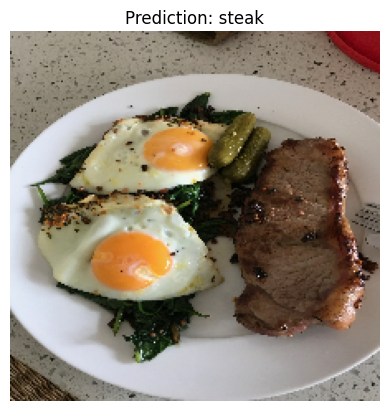

In [80]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2024-09-03 16:07:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2024-09-03 16:07:13 (47.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


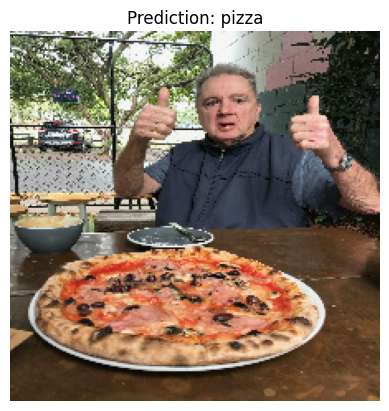

In [81]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

#multi class image classification

we were doing binary before oon only pizza and steak no we will do with multiclass classification(10 classes instead of 2)

1 : Become one with the data (visualize, visualize, visualize...)

2 : Preprocess the data (prepare it for a model)

3 : Create a model (start with a baseline)

4 : Fit the model

5 : Evaluate the model

6 : Adjust different parameters and improve model (try to beat your baseline)

7 : Repeat until satisfied

#1 : import and become one with data

In [82]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-09-03 16:07:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  55.9MB/s    in 9.2s    

2024-09-03 16:07:27 (54.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [83]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [84]:
#setup the training and test directory paths.

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [85]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape = (512, 512, 3)


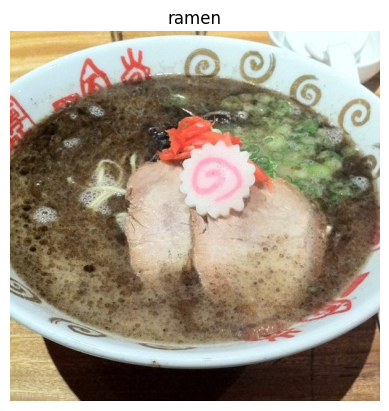

In [86]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

#preprocess the data(prepare for model)

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_7, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#4 : fit the model

In [89]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=train_data.samples,
                        validation_data=test_data,
                        validation_steps=test_data.samples)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 234/7500 ━━━━━━━━━━━━━━━━━━━━ 12:52 106ms/step - accuracy: 0.2077 - loss: 2.1699

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.2461 - loss: 2.0854 - val_accuracy: 0.3272 - val_loss: 1.9009
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.3844 - loss: 1.7930 - val_accuracy: 0.3512 - val_loss: 1.8888
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.5181 - loss: 1.4299 - val_accuracy: 0.3360 - val_loss: 1.9660
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.7289 - loss: 0.8418 - val_accuracy: 0.3160 - val_loss: 2.4381
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8970 - loss: 0.3404 - val_accuracy: 0.2940 - val_loss: 3.3752


#5 : evaluate the model

In [90]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.2834 - loss: 3.4572


[3.3752148151397705, 0.2939999997615814]

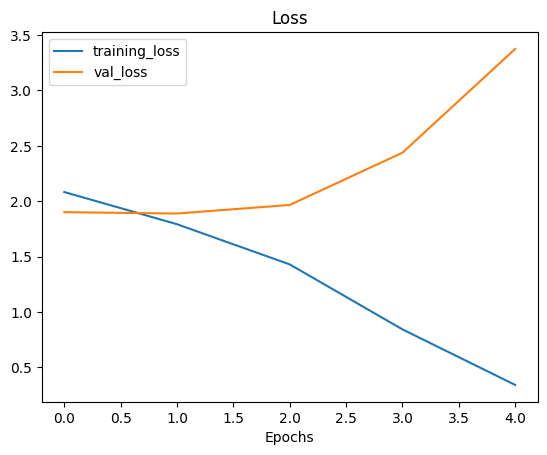

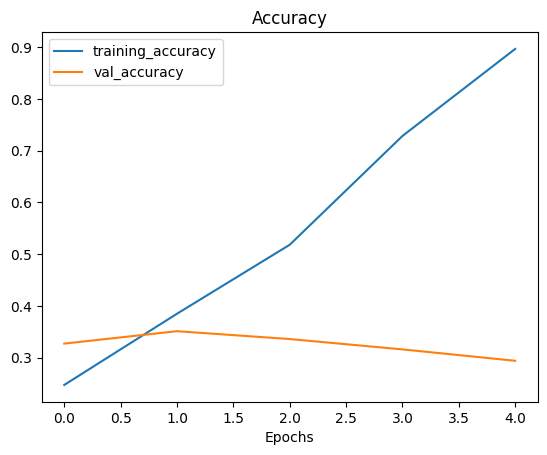

In [91]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_8)

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

# 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something.

However,it's nt generalizing well to unseen data(overfitting)

let's try and prevent our model overfitting. A couple of ways to prevent overfitting include:

 * Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
 * Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
 * Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
 * Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [92]:
# Try a simplified model (removed two layers)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=train_data.samples,
                          validation_data=test_data,
                          validation_steps=test_data.samples)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
 234/7500 ━━━━━━━━━━━━━━━━━━━━ 10:32 87ms/step - accuracy: 0.1854 - loss: 2.2188

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.2348 - loss: 2.1115 - val_accuracy: 0.2532 - val_loss: 2.0755
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.4146 - loss: 1.7383 - val_accuracy: 0.3444 - val_loss: 1.8908
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.5831 - loss: 1.2921 - val_accuracy: 0.3348 - val_loss: 2.0300
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.7549 - loss: 0.8132 - val_accuracy: 0.2992 - val_loss: 2.4402
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8961 - loss: 0.3977 - val_accuracy: 0.2932 - val_loss: 2.8950


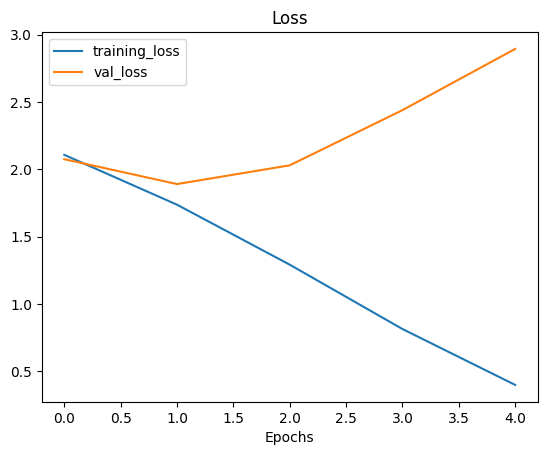

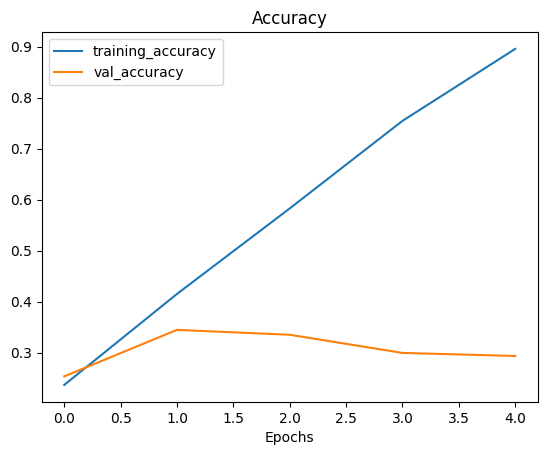

In [93]:
# Check out the loss curves of model_10
plot_loss_curves(history_9)

even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

let's do data augmentation

##trying to reduce overfitting with data augmentation

In [94]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [96]:
#let's create another model but this time we'll fit it on augmentaed tarining data of 10 classes
# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=train_data_augmented.samples,
                          validation_data=test_data,
                          validation_steps=test_data.samples)

Epoch 1/5
 234/7500 ━━━━━━━━━━━━━━━━━━━━ 47:18 391ms/step - accuracy: 0.1581 - loss: 2.2543

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 104s 13ms/step - accuracy: 0.1940 - loss: 2.1934 - val_accuracy: 0.2772 - val_loss: 2.0164
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 101s 13ms/step - accuracy: 0.2737 - loss: 2.0548 - val_accuracy: 0.3232 - val_loss: 1.9313
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 145s 13ms/step - accuracy: 0.2893 - loss: 2.0271 - val_accuracy: 0.3008 - val_loss: 1.9396
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 138s 13ms/step - accuracy: 0.3051 - loss: 1.9881 - val_accuracy: 0.3528 - val_loss: 1.8518
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 99s 13ms/step - accuracy: 0.3113 - loss: 1.9733 - val_accuracy: 0.3664 - val_loss: 1.8842


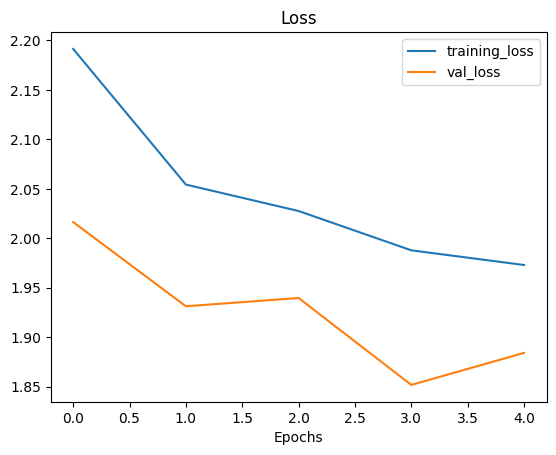

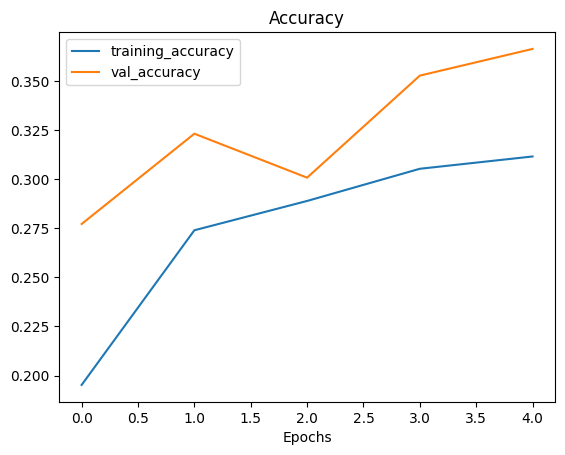

In [97]:
# Check out our model's performance with augmented data
plot_loss_curves(history_10)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

#7 : repeat untill satisfied

#making predictions with our trained model

In [98]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [99]:
#lets get our custom images
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [100]:
#reconfig pred_and_plot function to work with multi class image
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #add in logic for multi class
  if len(pred[0]) > 1 :
    pred_class = class_names[tf.argmax(pred[0])]
  else :
    pred_class = class_names[int(tf.round(pred)[0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step


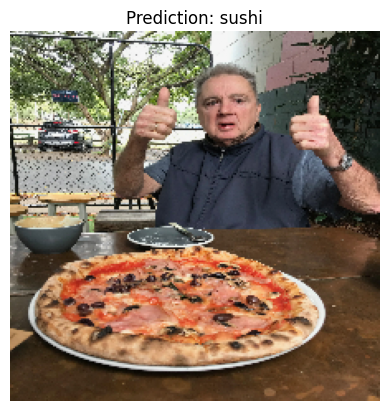

In [101]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


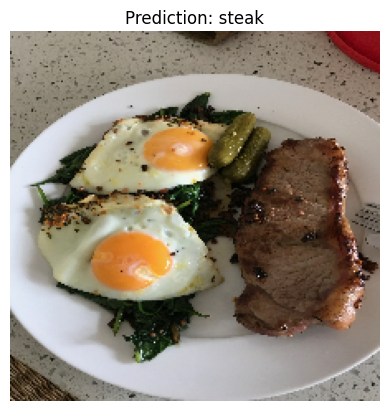

In [102]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


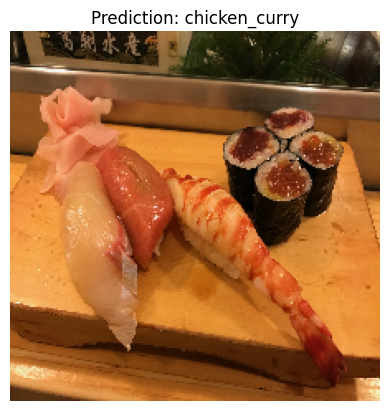

In [103]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


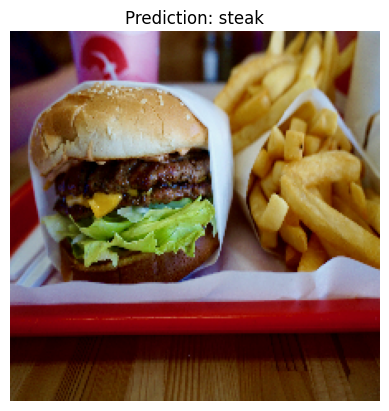

In [104]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

#saving and loading our model

In [107]:
#save model
model_10.save("saved_trained_model_10.h5")

In [108]:
#load in trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.h5")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.3716 - loss: 1.8670


[1.8841605186462402, 0.36640000343322754]

In [109]:
#compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.3828 - loss: 1.8418


[1.8841605186462402, 0.36640000343322754]